<a href="https://colab.research.google.com/github/kaushik654/Deep-Learning--Hand-written-digit-classifier-using-CNN/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
import matplotlib.image as mping


Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
data=mnist.load_data()

In [0]:
len(data)

2

In [0]:
(x_train,y_train),(x_test,y_test)=data

In [0]:
len(x_train)

60000

5

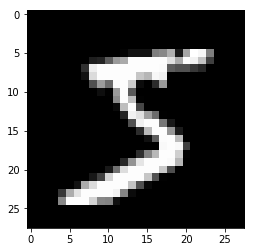

In [0]:
plt.imshow(x_train[0],cmap="gray")
y_train[0]

In [0]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


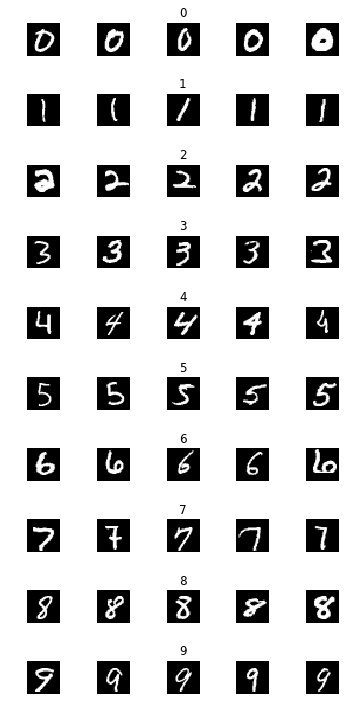

In [0]:
num_of_samples=[]
cols=5
num_class=10
fig,axs=plt.subplots(nrows=num_class,ncols=cols,figsize=(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_class):
    x_selected=x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))
 

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


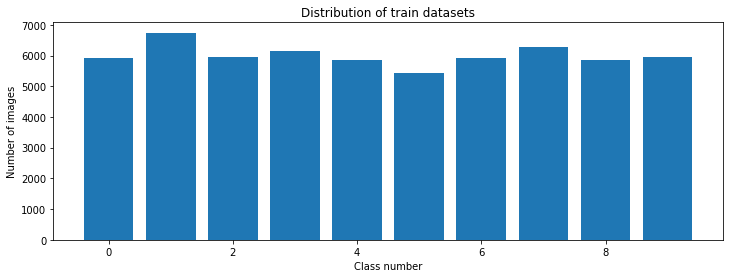

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_class),num_of_samples)
plt.title("Distribution of train datasets")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [0]:
y_train=to_categorical(y_train,10) #encoding in 1hot

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add((Dense(500,activation="relu")))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_class,activation="softmax"))
  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
  return model
            

In [0]:
lenet=le_net()
lenet.summary() #28-5-+1


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [0]:
history=lenet.fit(x_train,y_train,epochs=50,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 42us/step - loss: 0.0476 - acc: 0.9855 - val_loss: 0.0328 - val_acc: 0.9908
Epoch 2/50
54000/54000 [==============================] - 2s 40us/step - loss: 0.0436 - acc: 0.9866 - val_loss: 0.0317 - val_acc: 0.9913
Epoch 3/50
54000/54000 [==============================] - 2s 40us/step - loss: 0.0421 - acc: 0.9872 - val_loss: 0.0315 - val_acc: 0.9908
Epoch 4/50
54000/54000 [==============================] - 2s 39us/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 5/50
54000/54000 [==============================] - 2s 39us/step - loss: 0.0374 - acc: 0.9884 - val_loss: 0.0275 - val_acc: 0.9917
Epoch 6/50
54000/54000 [==============================] - 2s 39us/step - loss: 0.0379 - acc: 0.9878 - val_loss: 0.0285 - val_acc: 0.9920
Epoch 7/50
54000/54000 [==============================] - 2s 39us/step - loss: 0.0343 - acc: 0.9893 - val_loss: 0.0301 - val_acc:

In [0]:
# TRAINING IS DONE

Text(0.5, 0, 'epoch')

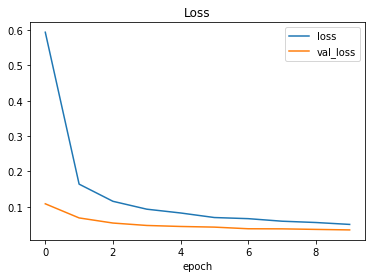

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

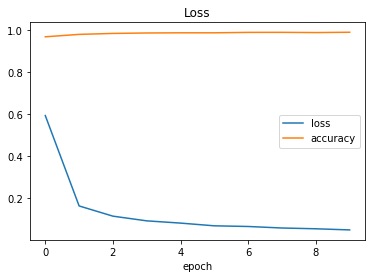

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_acc'])
plt.legend(['loss','accuracy'])
plt.title("Loss")
plt.xlabel("epoch")

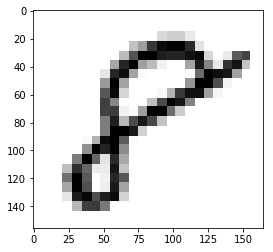

In [0]:
import requests as rq
from PIL import Image
url="https://kx.com/images/03_IMAGES/160520-8.png"
response=rq.get(url,stream=True)
img=Image.open(response.raw).convert("L")
plt.imshow(img,cmap="gray")

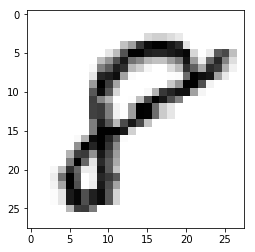

In [0]:
import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(28,28))
plt.imshow(res,cmap="gray")


In [0]:
res=res/255
res=res.reshape(1,28,28,1)

In [0]:
lenet.predict(res)

array([[1.9868283e-02, 7.1543345e-04, 6.3609279e-04, 5.1920832e-04,
        2.5332024e-02, 8.2197018e-02, 7.4997282e-01, 1.7588781e-02,
        9.3588017e-02, 9.5823091e-03]], dtype=float32)

In [0]:
lenet.predict_classes(res)

array([8])